In [ ]:
!pip install pandas numpy matplotlib seaborn tqdm


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [ ]:
json_path="/content/user-wallet-transactions.json"

In [ ]:
with open(json_path, 'r') as f:
    data = json.load(f)

In [ ]:
df = pd.DataFrame(data)
df.head()

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,1629178166,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,1621525013,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,1627118913,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,1627773318,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,1618845907,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   _id          100000 non-null  object
 1   userWallet   100000 non-null  object
 2   network      100000 non-null  object
 3   protocol     100000 non-null  object
 4   txHash       100000 non-null  object
 5   logId        100000 non-null  object
 6   timestamp    100000 non-null  int64 
 7   blockNumber  100000 non-null  int64 
 8   action       100000 non-null  object
 9   actionData   100000 non-null  object
 10  __v          100000 non-null  int64 
 11  createdAt    100000 non-null  object
 12  updatedAt    100000 non-null  object
dtypes: int64(3), object(10)
memory usage: 9.9+ MB


In [ ]:
df.describe()

,timestamp,blockNumber,__v
count,1.000000e+05,1.000000e+05,100000.0
mean,1.623891e+09,1.623891e+09,0.0
std,3.016214e+06,3.016214e+06,0.0
min,1.617210e+09,1.617210e+09,0.0
25%,1.621585e+09,1.621585e+09,0.0
50%,1.623415e+09,1.623415e+09,0.0
75%,1.626057e+09,1.626057e+09,0.0
max,1.630605e+09,1.630605e+09,0.0


In [ ]:
df.isnull().sum()

,0
_id,0
userWallet,0
network,0
protocol,0
txHash,0
logId,0
timestamp,0
blockNumber,0
action,0
actionData,0


In [ ]:
def extract_amount(x):
    try:
        return float(x.get('amount', 0)) / 1e18  # adjust token decimal
    except:
        return 0.0

wallets = df['userWallet'].unique()
wallet_stats = []

for wallet in tqdm(wallets):
    w_df = df[df['userWallet'] == wallet]
    actions = w_df['action'].value_counts().to_dict()

    deposit_amt = w_df[w_df['action'] == 'deposit']['actionData'].apply(extract_amount).sum()
    borrow_amt = w_df[w_df['action'] == 'borrow']['actionData'].apply(extract_amount).sum()
    repay_amt = w_df[w_df['action'] == 'repay']['actionData'].apply(extract_amount).sum()
    liquidation_count = w_df[w_df['action'] == 'liquidationcall'].shape[0]

    timestamps = pd.to_datetime(w_df['timestamp'], unit='s').sort_values()
    duration_days = (timestamps.max() - timestamps.min()).days if len(timestamps) > 1 else 0

    wallet_stats.append({
        'wallet': wallet,
        'total_actions': len(w_df),
        'deposit_amount': deposit_amt,
        'borrow_amount': borrow_amt,
        'repay_amount': repay_amt,
        'repayment_ratio': repay_amt / borrow_amt if borrow_amt > 0 else 1,
        'borrow_deposit_ratio': borrow_amt / deposit_amt if deposit_amt > 0 else 0,
        'liquidations': liquidation_count,
        'active_days': duration_days
    })

wallet_df = pd.DataFrame(wallet_stats)
wallet_df.head()


100%|██████████| 3497/3497 [00:59<00:00, 59.10it/s]


,wallet,total_actions,deposit_amount,borrow_amount,repay_amount,repayment_ratio,borrow_deposit_ratio,liquidations,active_days
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,2.000000e-09,0.0,0.000000e+00,1.000000e+00,0.000000,0,0
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,1.450000e+02,0.0,0.000000e+00,1.000000e+00,0.000000,0,0
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,5.000000e-03,0.0,0.000000e+00,1.000000e+00,0.000000,0,7
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,0.000000e+00,0.0,0.000000e+00,1.000000e+00,0.000000,0,129
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,9.459366e+04,39460.0,7.002457e-08,1.774571e-12,0.417153,0,132


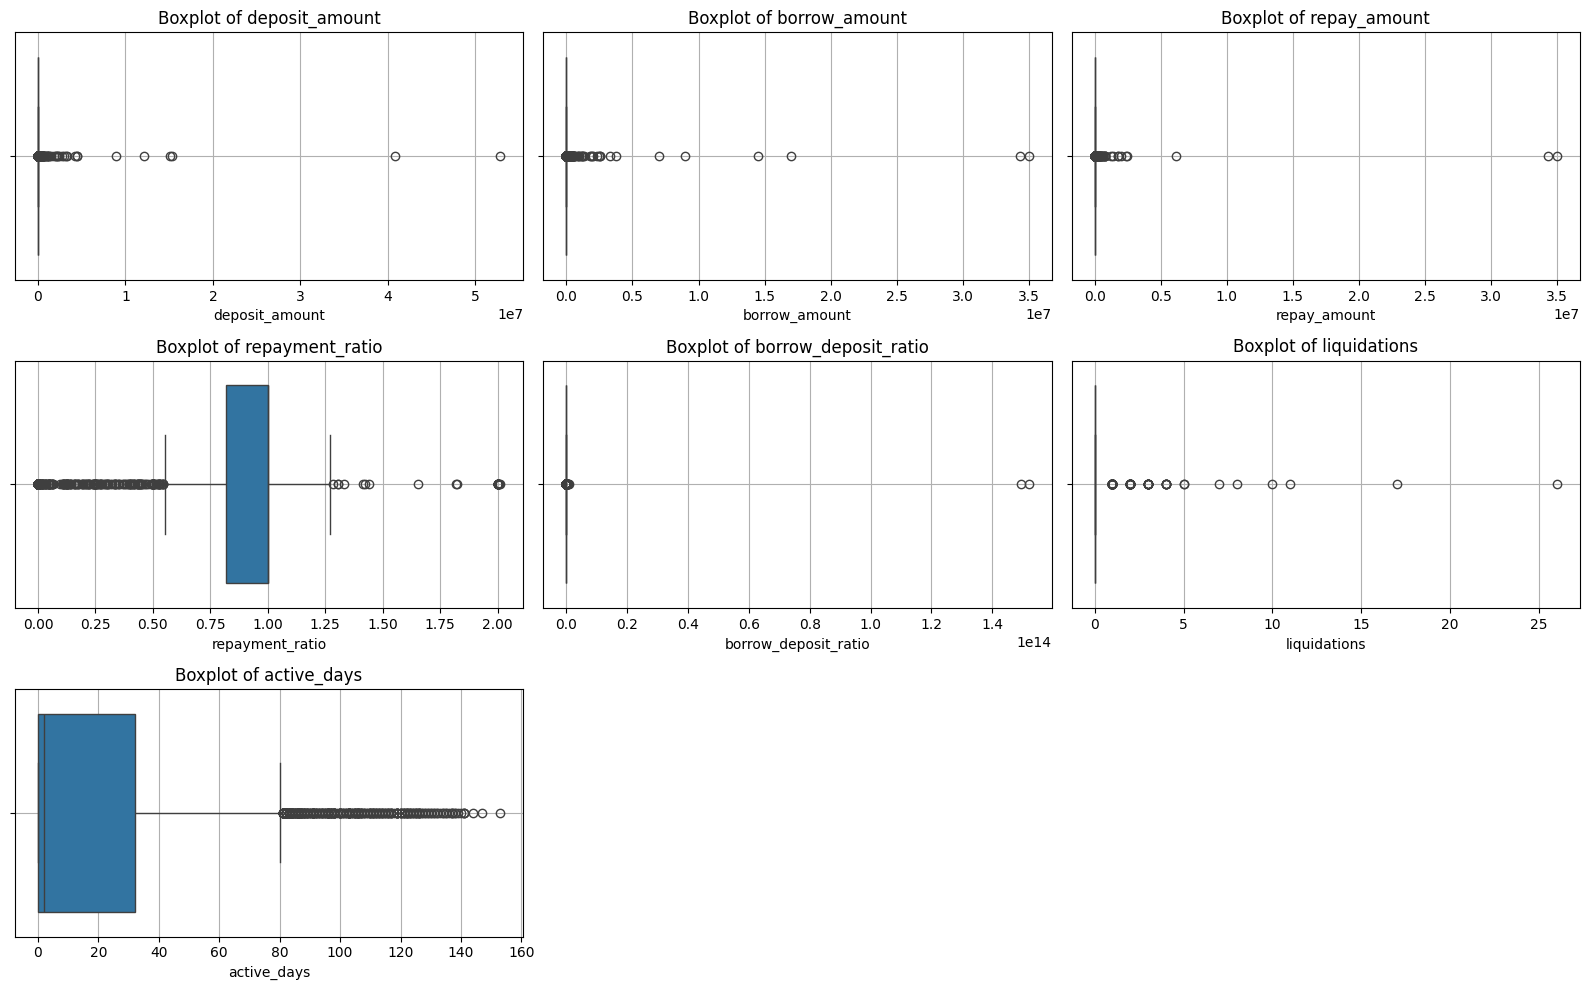

In [ ]:
numeric_cols = ['deposit_amount', 'borrow_amount', 'repay_amount',
                'repayment_ratio', 'borrow_deposit_ratio', 'liquidations', 'active_days']

# Plot boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=wallet_df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

# Print outliers for each numeric column
for col in numeric_cols:
    outliers = find_outliers_iqr(wallet_df, col)
    print(f"{col}: {len(outliers)} outliers")


deposit_amount: 717 outliers
borrow_amount: 849 outliers
repay_amount: 812 outliers
repayment_ratio: 823 outliers
borrow_deposit_ratio: 610 outliers
liquidations: 101 outliers
active_days: 306 outliers


In [ ]:
from sklearn.preprocessing import RobustScaler

numeric_cols = ['deposit_amount', 'borrow_amount', 'repay_amount',
                'repayment_ratio', 'borrow_deposit_ratio',
                'liquidations', 'active_days']

scaler = RobustScaler()
scaled_data = scaler.fit_transform(wallet_df[numeric_cols])


scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)
scaled_df['wallet'] = wallet_df['wallet'].values
scaled_df.head()


,deposit_amount,borrow_amount,repay_amount,repayment_ratio,borrow_deposit_ratio,liquidations,active_days,wallet
0,-0.001565,0.000000,0.000000,0.000000,0.000000,0.0,-0.06250,0x00000000001accfa9cef68cf5371a23025b6d4b6
1,0.250609,0.000000,0.000000,0.000000,0.000000,0.0,-0.06250,0x000000000051d07a4fb3bd10121a343d85818da6
2,-0.001557,0.000000,0.000000,0.000000,0.000000,0.0,0.15625,0x000000000096026fb41fc39f9875d164bd82e2dc
3,-0.001565,0.000000,0.000000,0.000000,0.000000,0.0,3.96875,0x0000000000e189dd664b9ab08a33c4839953852c
4,164.509145,136923.154333,38.900212,-5.523526,2.714803,0.0,4.06250,0x0000000002032370b971dabd36d72f3e5a7bf1ee


In [ ]:
# Combine behavior into a custom score
scaled_df['score_raw'] = (
    0.4 * scaled_df['repayment_ratio'] +
    0.2 * (1 - scaled_df['borrow_deposit_ratio']) +
    0.2 * scaled_df['active_days'] +
    0.2 * (1 - (wallet_df['liquidations'] / (wallet_df['total_actions'] + 1)))  # avoid division by zero
)

# Normalize score to range 0–1000
min_score = scaled_df['score_raw'].min()
max_score = scaled_df['score_raw'].max()
scaled_df['score'] = ((scaled_df['score_raw'] - min_score) / (max_score - min_score)) * 1000
scaled_df['score'] = scaled_df['score'].round()

# View scores
scaled_df[['wallet', 'score']].head()


,wallet,score
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1000.0
1,0x000000000051d07a4fb3bd10121a343d85818da6,1000.0
2,0x000000000096026fb41fc39f9875d164bd82e2dc,1000.0
3,0x0000000000e189dd664b9ab08a33c4839953852c,1000.0
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,1000.0


Analysis for analysis.md

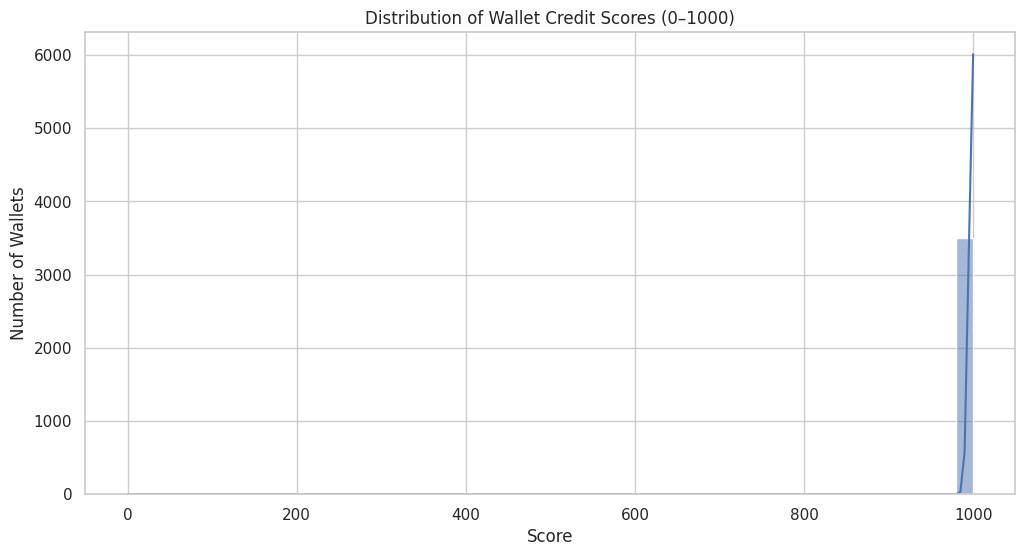

In [ ]:
sns.set(style="whitegrid")

# Histogram of raw scores
plt.figure(figsize=(12, 6))
sns.histplot(scaled_df['score'], bins=50, kde=True)
plt.title('Distribution of Wallet Credit Scores (0–1000)')
plt.xlabel('Score')
plt.ylabel('Number of Wallets')
plt.show()


In [ ]:
# Modify score logic for better contrast
scaled_df['score_raw'] = (
    0.3 * scaled_df['repayment_ratio'] +                     # reward good repayment
    0.2 * (1 - scaled_df['borrow_deposit_ratio'].clip(-5, 5)) +  # penalize high borrow/deposit
    0.2 * scaled_df['active_days'] +
    0.3 * (1 - wallet_df['liquidations'] / (wallet_df['total_actions'] + 1))  # strong penalty for liquidation
)


In [ ]:
# Normalize to 0–1000
min_score = scaled_df['score_raw'].min()
max_score = scaled_df['score_raw'].max()
scaled_df['score'] = ((scaled_df['score_raw'] - min_score) / (max_score - min_score)) * 1000
scaled_df['score'] = scaled_df['score'].round()


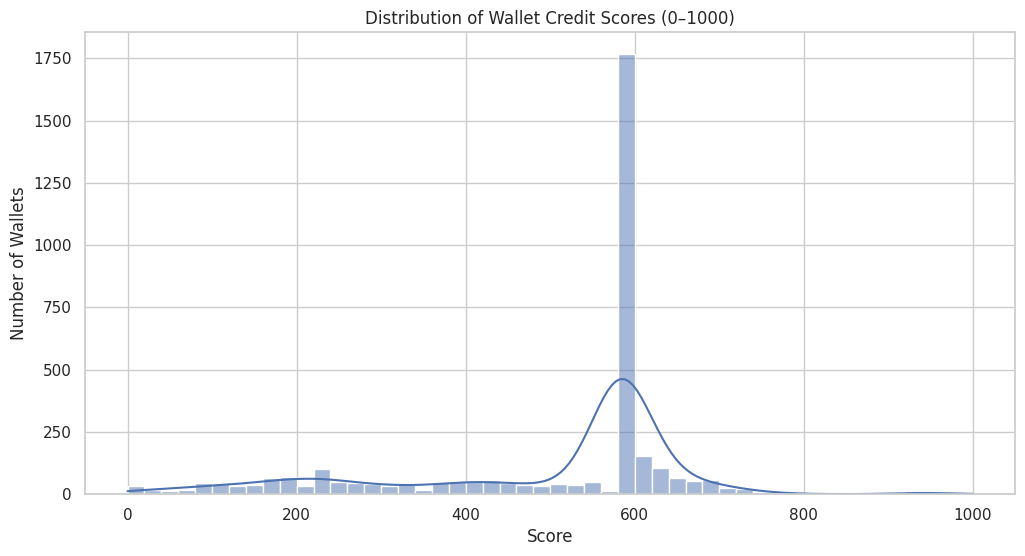

In [ ]:
sns.set(style="whitegrid")

# Histogram of raw scores
plt.figure(figsize=(12, 6))
sns.histplot(scaled_df['score'], bins=50, kde=True)
plt.title('Distribution of Wallet Credit Scores (0–1000)')
plt.xlabel('Score')
plt.ylabel('Number of Wallets')
plt.show()

ML-Based Extension (Optional)

As an enhancement, I also experimented with training a Random Forest Regressor using the engineered wallet features. The target labels were the scores generated by the heuristic model.

This allowed us to:
- Evaluate model-learned scoring behavior
- Interpret feature importances
- Replace manual weights with data-driven predictions

ML model
Train Regression Model

In [ ]:
# Step 1: Features and Labels
X = scaled_df[numeric_cols]  # Input features
y = scaled_df['score']       # Target (pseudo labels from heuristic)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9970323051949306
MSE: 92.8414572857143


In [ ]:
scaled_df['ml_score'] = model.predict(X)  # Predict all wallets
scaled_df['ml_score'] = scaled_df['ml_score'].clip(0, 1000).round()


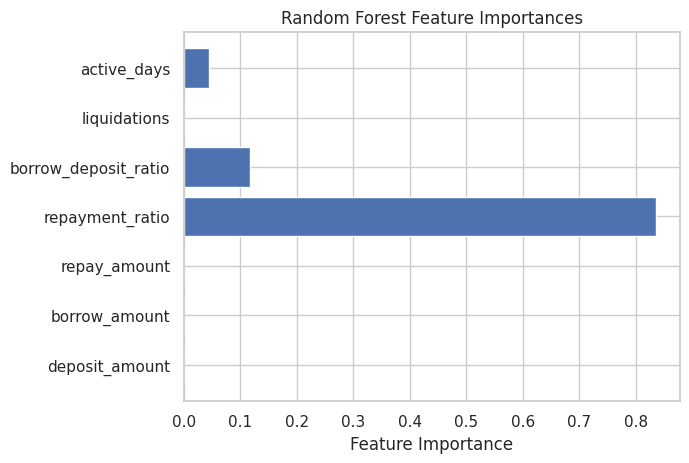

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(numeric_cols, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()


with scores + features

In [ ]:
# Save the wallet scores to a CSV file
scaled_df[['wallet', 'score']].to_csv('wallet_credit_scores.csv', index=False)

# Show confirmation
print("✅ File saved as wallet_credit_scores.csv")


✅ File saved as wallet_credit_scores.csv


In [23]:
# Merge scores and original wallet features
final_df = scaled_df[['wallet', 'score']].merge(
    wallet_df[['wallet', 'deposit_amount', 'borrow_amount', 'repay_amount',
               'repayment_ratio', 'borrow_deposit_ratio', 'liquidations', 'active_days']],
    on='wallet',
    how='left'
)

# Save to CSV
final_df.to_csv('wallet_credit_scores.csv', index=False)
print("✅ wallet_credit_scores.csv saved with full feature set.")


✅ wallet_credit_scores.csv saved with full feature set.
